In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
data1 = pd.read_csv('adult.csv')
data2 = pd.read_csv('gender_submission.csv')
data3 = pd.read_csv('indian_liver_patient.csv')

In [ ]:
# Preprocess the data
X1 = data1.drop(['income'], axis=1)
y1 = data1['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
X1 = pd.get_dummies(X)

In [ ]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

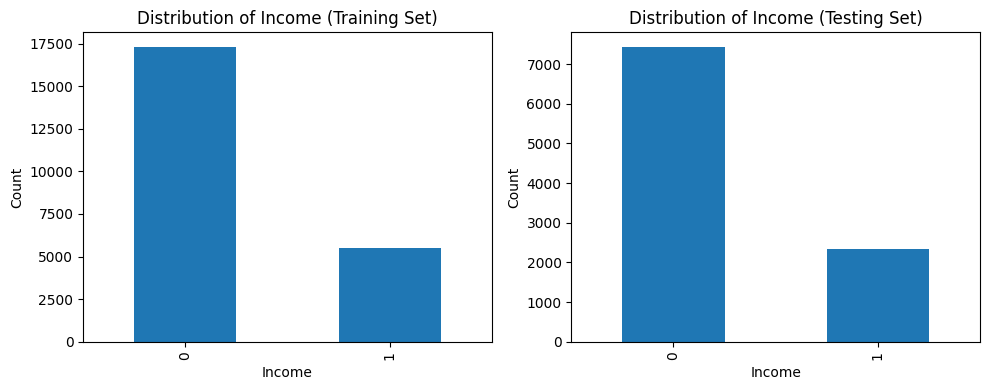

In [ ]:
# Plot the distribution of the target variable in the training and testing sets
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
pd.Series(y_train).value_counts().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income (Training Set)')
plt.subplot(1, 2, 2)
pd.Series(y_test).value_counts().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income (Testing Set)')
plt.tight_layout()
plt.show()

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create an MLP classifier
mlpS = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', max_iter=500, random_state=42)

In [ ]:
# Train the MLP classifier
mlpS.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

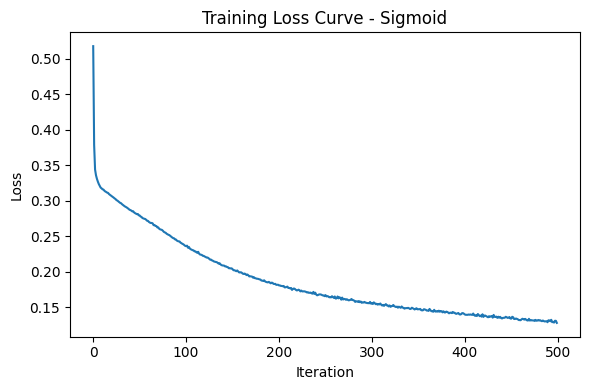

In [ ]:
# Plot the training loss curve
plt.figure(figsize=(6, 4))
plt.plot(mlpS.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve - Sigmoid')
plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = mlpS.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8174838775719111
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7429
           1       0.62      0.63      0.62      2340

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



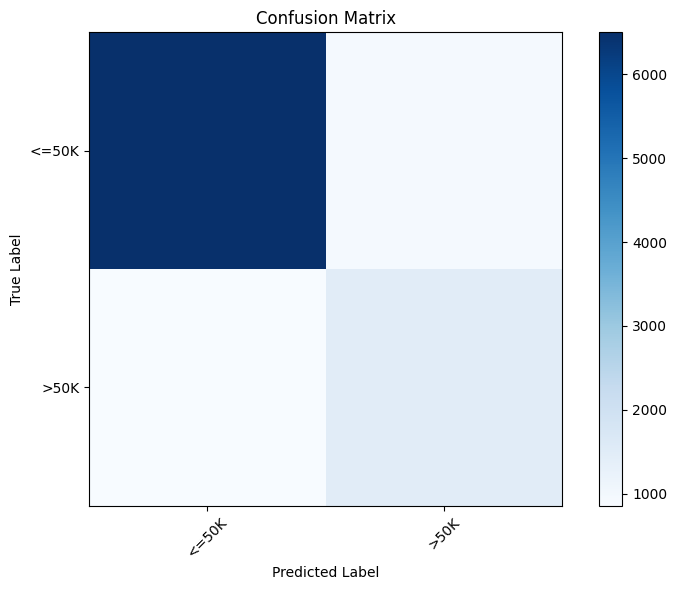

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, ['<=50K', '>50K'], rotation=45)
plt.yticks(tick_marks, ['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()